# Problem 1

import library

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

read dataset

In [55]:
data = pd.read_csv("/content/data.csv")

In [56]:
data

,F,N,Prprice per square foot
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
...,...,...,...
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53


In [57]:
data.isnull().sum()

F                          0
N                          0
Prprice per square foot    0
dtype: int64

In [58]:
data.shape

(100, 3)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   F                        100 non-null    float64
 1   N                        100 non-null    float64
 2   Prprice per square foot  100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [60]:
data.describe()

,F,N,Prprice per square foot
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


scaling data

In [61]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
allsc = sc.fit_transform(data)

In [62]:
df = pd.DataFrame(allsc)

In [63]:
df.head()

,0,1,2
0,-0.377265,0.583471,-0.124647
1,1.503928,-0.889115,0.471350
2,0.990875,-0.692770,0.155381
3,-0.924521,-0.169184,-0.821290
4,-1.642794,1.074333,-0.764919


In [64]:
x = df.iloc[:,0:2].values
y=df.iloc[:,-1].values

splitting data

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.20, random_state = 0)

training model

In [66]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

prediction

In [67]:
y_pred = reg.predict(x_test)

In [68]:
y_pred

array([-0.37075684, -1.43353291,  0.34046458, -1.39946387,  0.29374307,
       -0.9160151 ,  0.10036309,  0.05071943,  0.3560392 ,  0.41882197,
        0.57018377,  1.20807714,  1.44688172,  1.72705485, -0.08149832,
       -0.44765433,  1.25058194, -1.26059389,  0.97430189,  0.43504622])

In [28]:
y_test

array([-0.55630859, -1.22534453,  0.15538128, -1.18766785,  0.05236364,
       -0.91594435, -0.10644559, -0.20570135,  0.17803938,  0.23730346,
        0.42991173,  1.3366985 ,  1.70521808,  2.27305944, -0.28655284,
       -0.61641186,  1.42325069, -1.10646912,  0.98771176,  0.24873379])

visualise

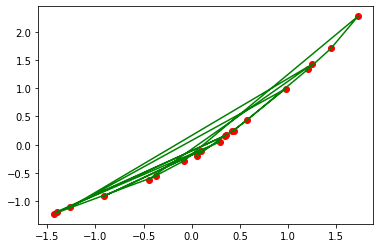

In [72]:
plt.scatter(y_pred, y_test, color= 'red')
plt.plot(y_pred, y_test,color = 'green')

F is the number of observed features. N is the number of rows both are consider as independent variable x.
y is dependent. It is price per square foot.
Apply Multiple Regression model. Then plot scatter plot for visualise regression line.

#PROBLEM 2

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [74]:
data = pd.read_csv("/content/dataset.csv")

In [75]:
data

,id,age,income,gender,marital status,buys
0,1,<21,high,male,single,no
1,2,<21,high,male,married,no
2,3,21-35,high,male,single,yes
3,4,>35,medium,male,single,yes
4,5,>35,low,female,single,yes
5,6,>35,low,female,married,no
6,7,21-35,low,female,married,yes
7,8,<21,medium,male,single,no
8,9,<21,low,female,married,yes
9,10,>35,medium,female,single,yes


In [76]:
df= data.drop(["id"], axis=1)
df

,age,income,gender,marital status,buys
0,<21,high,male,single,no
1,<21,high,male,married,no
2,21-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,married,no
6,21-35,low,female,married,yes
7,<21,medium,male,single,no
8,<21,low,female,married,yes
9,>35,medium,female,single,yes


In [77]:
# preprocessing

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df = df.apply(l.fit_transform)

In [78]:
df

,age,income,gender,marital status,buys
0,1,0,1,1,0
1,1,0,1,0,0
2,0,0,1,1,1
3,2,2,1,1,1
4,2,1,0,1,1
5,2,1,0,0,0
6,0,1,0,0,1
7,1,2,1,1,0
8,1,1,0,0,1
9,2,2,0,1,1


In [79]:
x = df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [80]:
x

array([[1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 1],
       [2, 2, 1, 1],
       [2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 2, 1, 1],
       [1, 1, 0, 0],
       [2, 2, 0, 1],
       [1, 2, 0, 0],
       [0, 2, 1, 0],
       [0, 0, 0, 1],
       [2, 2, 1, 0]])

In [81]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.25, random_state = 0)

In [83]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy', random_state = 0)
classifier.fit(x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [84]:
y_pred = classifier.predict(x_test)

In [85]:
y_pred

array([0, 1, 0, 1])

In [86]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
cm

array([[0, 0],
       [2, 2]])

In [87]:
#accuracy 
accuracy_score(y_test , y_pred)

0.5

In [88]:
classifier.predict([[1, 2, 1, 1]])

array([0])

In above type prediction is "no"
i.e. Buys  from single male and he is above 21 years.